<a href="https://colab.research.google.com/github/smithapriya/smithapriya.github.io/blob/master/Hinge_Data_Challenge_SmithaPriya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# Hinge Data Challenge
Applicant: Smitha Priya

Questions:
1. Using only information in the datasets provided, how would you define the next-day retention rate of
new users? (We will henceforth call this “retention rate.”) State your definition in a way that
someone else can compute the metric unambiguously, and provide your reasoning for your
approach.
2. Hinge’s COO, Sam, claims that retention rates of Android and iOS users are different. Does the data
support Sam’s claim? Is the retention rate of users on one platform consistently and statistically
lower than that of the other?
3. If Android/iOS user retention rates are different, what behavioral or demographic insights might explain this difference? If Android/iOS user retention rates are not different, what behavioral or demographic factors seem
to contribute to retention in general?
4. Your Product Manager (PM) asks you to design an experiment to improve the retention rate for all users
(i.e., regardless of platform). You can either draw upon findings from your answer in question 3 or
propose any other idea, but be sure your answer clearly states:
  a. Your hypothesis
  b. A description of the variants of your experiment
  c. The primary outcomes you’ll use to evaluate your experiment
  d. Any other information you think will be useful for your PM

Assumptions/Concerns
1. There is no timezone information provided in these datasets. Therefore, I will be assuming that the timestamps are recorded in a consistent manner, without any timezone offsets or variations.

In [4]:
#Upload and read datasets
ratings_df = pd.read_csv('drive/MyDrive/ratings.csv')
users_df = pd.read_csv('drive/MyDrive/users.csv')

In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18517862 entries, 0 to 18517861
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   rating_type  int64 
 2   ts_minute    object
 3   ct           int64 
dtypes: int64(3), object(1)
memory usage: 565.1+ MB


In [6]:
ratings_df.head()

,user_id,rating_type,ts_minute,ct
0,5100,1,2018-10-15 01:55:00,1
1,5088,1,2018-10-15 02:08:00,3
2,5095,0,2018-10-15 02:25:00,6
3,5095,1,2018-10-15 02:40:00,1
4,5095,0,2018-10-15 03:13:00,8


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111724 entries, 0 to 111723
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                111724 non-null  int64  
 1   platform               111724 non-null  object 
 2   registration_ts        111724 non-null  object 
 3   profile_completion_ts  111724 non-null  object 
 4   gender                 111723 non-null  float64
 5   gender_preference      111574 non-null  float64
 6   photos_count           111724 non-null  int64  
 7   max_distance           111624 non-null  float64
 8   metro_area             111724 non-null  int64  
 9   age                    111724 non-null  int64  
 10  age_pref_max           111622 non-null  float64
 11  age_pref_min           111622 non-null  float64
 12  age_strict             111621 non-null  float64
 13  height                 111713 non-null  float64
 14  height_pref_max        111591 non-nu

In [8]:
ratings_df

,user_id,rating_type,ts_minute,ct
0,5100,1,2018-10-15 01:55:00,1
1,5088,1,2018-10-15 02:08:00,3
2,5095,0,2018-10-15 02:25:00,6
3,5095,1,2018-10-15 02:40:00,1
4,5095,0,2018-10-15 03:13:00,8
...,...,...,...,...
18517857,124942,0,2018-10-21 15:21:00,1
18517858,246616,0,2018-10-22 12:25:00,1
18517859,146473,1,2018-10-26 04:09:00,1
18517860,42551,1,2018-11-16 23:03:00,1


In [9]:
users_df

,user_id,platform,registration_ts,profile_completion_ts,gender,gender_preference,photos_count,max_distance,metro_area,age,...,height_pref_max,height_pref_min,height_strict,education_attained,dogs,cats,hobby1,hobby2,hobby3,hobby4
0,59758,Android,2018-10-19 11:46:12,2018-10-19 11:55:46,0.0,2.0,5,14.0,0,19,...,214.0,92.0,0.0,0.0,0.0,3.0,0,0,0,1
1,65302,iOS,2018-10-23 15:49:03,2018-10-23 15:57:18,1.0,0.0,5,40.0,2,34,...,214.0,180.0,1.0,0.0,2.0,0.0,0,0,0,1
2,91558,Android,2018-10-26 09:16:35,2018-10-26 09:21:13,0.0,1.0,5,50.0,57,23,...,184.0,166.0,0.0,0.0,2.0,3.0,0,0,0,0
3,203292,Android,2018-11-05 01:03:21,2018-11-05 01:09:34,0.0,1.0,5,63.0,0,28,...,214.0,92.0,0.0,3.0,2.0,1.0,0,0,0,1
4,222381,Android,2018-11-12 15:17:46,2018-11-12 15:19:52,0.0,1.0,5,100.0,0,25,...,214.0,92.0,0.0,3.0,0.0,3.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111719,246795,iOS,2018-11-14 02:01:27,2018-11-14 02:07:41,1.0,0.0,5,29.0,39,25,...,196.0,177.0,1.0,3.0,2.0,3.0,0,0,0,1
111720,99908,Android,2018-10-31 21:59:52,2018-10-31 22:00:01,0.0,1.0,5,100.0,27,20,...,214.0,92.0,0.0,1.0,1.0,3.0,0,0,0,0
111721,166198,Android,2018-10-27 11:09:41,2018-10-27 11:11:20,1.0,0.0,5,100.0,0,22,...,214.0,92.0,0.0,3.0,0.0,2.0,0,0,0,1
111722,238222,Android,2018-11-11 17:22:36,2018-11-11 17:27:36,1.0,0.0,5,100.0,2,22,...,214.0,92.0,0.0,1.0,2.0,3.0,0,0,0,1


### Data Cleaning

In [10]:
#Convert to string timestamps to datetime object
ratings_df['ts_minute'] = pd.to_datetime(ratings_df['ts_minute'] )
users_df['registration_ts'] = pd.to_datetime(users_df['registration_ts'])
users_df['profile_completion_ts'] = pd.to_datetime(users_df['profile_completion_ts'])

In [11]:
#Add columns to both datasets extracting just the date from the timestamps
users_df['registration_date'] = users_df['registration_ts'].dt.date
ratings_df['activity_date'] = ratings_df['ts_minute'].dt.date

In [12]:
# correct spelling error in users_df
users_df['platform'] = users_df['platform'].replace('ios', 'iOS')

In [13]:
ratings_df.info()
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18517862 entries, 0 to 18517861
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   rating_type    int64         
 2   ts_minute      datetime64[ns]
 3   ct             int64         
 4   activity_date  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 706.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111724 entries, 0 to 111723
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                111724 non-null  int64         
 1   platform               111724 non-null  object        
 2   registration_ts        111724 non-null  datetime64[ns]
 3   profile_completion_ts  111724 non-null  datetime64[ns]
 4   gender                 111723 non-null  float64       
 5   gender_preference      111574 non-

# Retention Rates

1. Using only information in the datasets provided, how would you define the next-day retention rate of
new users? (We will henceforth call this “retention rate.”) State your definition in a way that
someone else can compute the metric unambiguously, and provide your reasoning for your
approach.

Using the datasets provided, I would define next-day retention rate as:

**Next-Day Retention Rate = (Number of New Users Active on Day 1 / Number New Users on Day 0) * 100**

## Definitions:

*Number New Users on Day 0:* Day 0 is defined using `registration_ts `from `users.csv`. For any given day as Day 0, the number of new users on Day 0 is the number of unique `user_ids` who registered on that given day.

*Number of New Users Active on Day 1*: Day 1 activity is defined using `ratings.csv`. Activity is defined as any rating action (like or skip) on Day 1. Day 1 is defined as the consecutive following day after Day 0, using `ts_minute`.

In [14]:
new_users = users_df[['user_id', 'platform', 'registration_date']]

In [15]:
new_users

,user_id,platform,registration_date
0,59758,Android,2018-10-19
1,65302,iOS,2018-10-23
2,91558,Android,2018-10-26
3,203292,Android,2018-11-05
4,222381,Android,2018-11-12
...,...,...,...
111719,246795,iOS,2018-11-14
111720,99908,Android,2018-10-31
111721,166198,Android,2018-10-27
111722,238222,Android,2018-11-11


In [16]:
user_activity = ratings_df[['user_id', 'activity_date']].drop_duplicates()

In [17]:
new_users_activity = pd.merge(new_users, user_activity, on='user_id', how='left')

In [18]:
from datetime import timedelta

new_users_activity['next_day'] = (pd.to_datetime(new_users_activity['registration_date']) + timedelta(days=1)).dt.date

In [19]:
new_users_activity

,user_id,platform,registration_date,activity_date,next_day
0,59758,Android,2018-10-19,2018-10-19,2018-10-20
1,59758,Android,2018-10-19,2018-10-20,2018-10-20
2,65302,iOS,2018-10-23,2018-10-23,2018-10-24
3,65302,iOS,2018-10-23,2018-10-24,2018-10-24
4,65302,iOS,2018-10-23,2018-10-25,2018-10-24
...,...,...,...,...,...
982239,238222,Android,2018-11-11,2018-11-15,2018-11-12
982240,82459,Android,2018-11-10,2018-11-11,2018-11-11
982241,82459,Android,2018-11-10,2018-11-10,2018-11-11
982242,82459,Android,2018-11-10,2018-11-15,2018-11-11


In [20]:
new_users_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982244 entries, 0 to 982243
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            982244 non-null  int64 
 1   platform           982244 non-null  object
 2   registration_date  982244 non-null  object
 3   activity_date      981394 non-null  object
 4   next_day           982244 non-null  object
dtypes: int64(1), object(4)
memory usage: 37.5+ MB


In [21]:
new_users_activity['active_next_day'] = np.where(
    new_users_activity['activity_date'] == new_users_activity['next_day'], 1, 0)

In [22]:
new_users_activity

,user_id,platform,registration_date,activity_date,next_day,active_next_day
0,59758,Android,2018-10-19,2018-10-19,2018-10-20,0
1,59758,Android,2018-10-19,2018-10-20,2018-10-20,1
2,65302,iOS,2018-10-23,2018-10-23,2018-10-24,0
3,65302,iOS,2018-10-23,2018-10-24,2018-10-24,1
4,65302,iOS,2018-10-23,2018-10-25,2018-10-24,0
...,...,...,...,...,...,...
982239,238222,Android,2018-11-11,2018-11-15,2018-11-12,0
982240,82459,Android,2018-11-10,2018-11-11,2018-11-11,1
982241,82459,Android,2018-11-10,2018-11-10,2018-11-11,0
982242,82459,Android,2018-11-10,2018-11-15,2018-11-11,0


In [23]:
retention = new_users_activity.groupby('registration_date').agg(
    new_users=('user_id', 'nunique'),
    next_day_retained_users=('active_next_day', 'sum')
).reset_index()

In [24]:
retention['next_day_retention_rate'] = (retention['next_day_retained_users'] / retention['new_users']) * 100

In [25]:
retention

,registration_date,new_users,next_day_retained_users,next_day_retention_rate
0,2018-10-15,3854,2976,77.218474
1,2018-10-16,3265,2522,77.243492
2,2018-10-17,3526,2699,76.545661
3,2018-10-18,3765,2876,76.387782
4,2018-10-19,2852,2148,75.315568
5,2018-10-20,3733,2873,76.962229
6,2018-10-21,4716,3643,77.247668
7,2018-10-22,3858,3036,78.693624
8,2018-10-23,3801,2904,76.400947
9,2018-10-24,3161,2470,78.139829


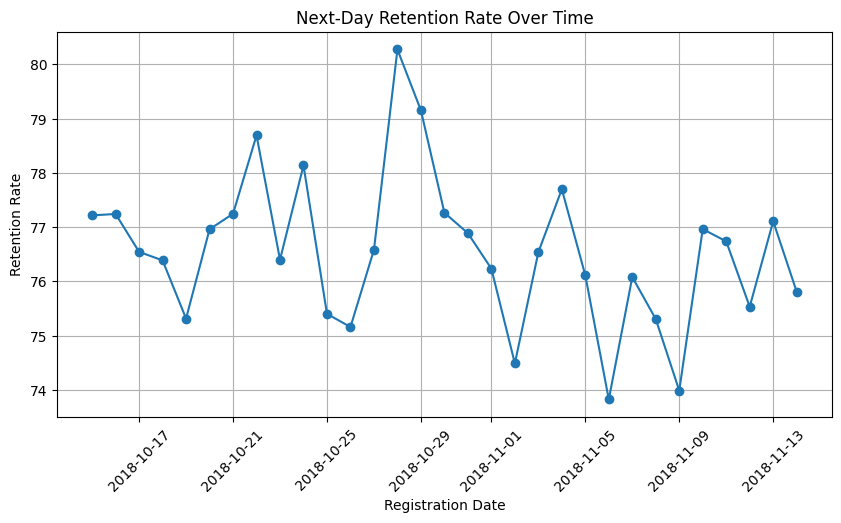

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(retention['registration_date'], retention['next_day_retention_rate'], marker='o')
plt.title('Next-Day Retention Rate Over Time')
plt.xlabel('Registration Date')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **Next-Day Retention by Platform**

2. Hinge’s COO, Sam, claims that retention rates of Android and iOS users are different. Does the data support Sam’s claim? Is the retention rate of users on one platform consistently and statistically lower than that of the other?

I used the chi-squared test was used to evaluate the statistical significance between the Android and iOS platforms because it effectively assesses whether observed differences in categorical data—such as user retention—are due to chance or reflect a true difference between the groups. In this case, user retention is categorical data because I defined it as a binary choice of the user to be active on the next-day.


The data does support Sam's claim - with some caveats. Overall, the next-day retention rate for the Android platform is higher than that of the iOS platform, and this difference is statistically significant. However, the Android retention rate is not consistently higher across all periods. During the month of October, the difference in next-day retention rates between the two platforms is not statistically significant. In contrast, in November, the difference becomes statistically significant, with a chi-squared test statistic of 68.27, indicating a substantial discrepancy between the two rates.

## Calculating Platform Retention

In [27]:
platform_retention = new_users_activity.groupby(['registration_date', 'platform']).agg(
    new_users=('user_id', 'nunique'),
    next_day_retained_users=('active_next_day', 'sum')
).reset_index()

In [28]:
platform_retention['next_day_retention_rate'] = (platform_retention['next_day_retained_users'] / platform_retention['new_users']) * 100

In [29]:
platform_retention

,registration_date,platform,new_users,next_day_retained_users,next_day_retention_rate
0,2018-10-15,Android,2314,1769,76.447710
1,2018-10-15,iOS,1540,1207,78.376623
2,2018-10-16,Android,1965,1495,76.081425
3,2018-10-16,iOS,1300,1027,79.000000
4,2018-10-17,Android,2079,1591,76.527177
...,...,...,...,...,...
57,2018-11-12,iOS,1995,1479,74.135338
58,2018-11-13,Android,2271,1771,77.983267
59,2018-11-13,iOS,1473,1116,75.763747
60,2018-11-14,Android,2039,1579,77.439922


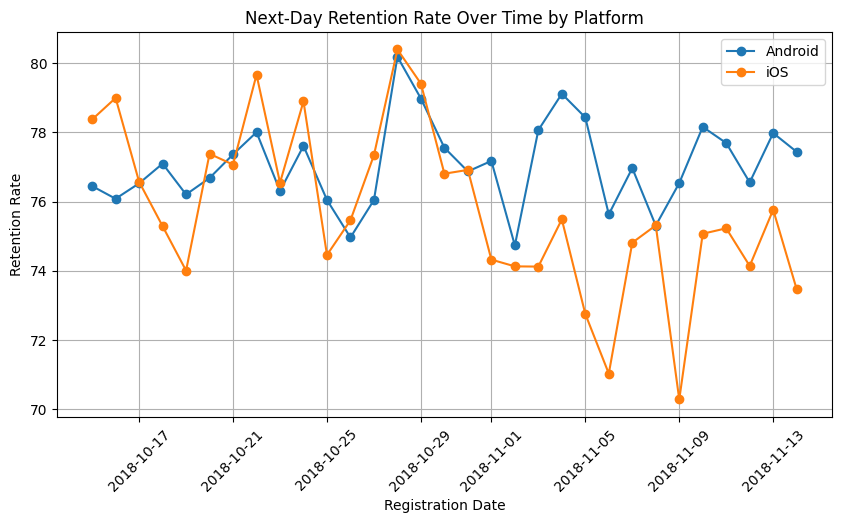

In [30]:
plt.figure(figsize=(10, 5))

for platform in platform_retention['platform'].unique():
    platform_data = platform_retention[platform_retention['platform'] == platform]
    plt.plot(platform_data['registration_date'], platform_data['next_day_retention_rate'], marker='o', label=platform)

plt.title('Next-Day Retention Rate Over Time by Platform')
plt.xlabel('Registration Date')
plt.ylabel('Retention Rate')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Calculating Statistical Significance Using Chi-Squared Test

In [31]:
from scipy.stats import chi2_contingency

total_new_users = platform_retention.groupby('platform')['new_users'].sum()
total_retained_users = platform_retention.groupby('platform')['next_day_retained_users'].sum()

observed = pd.DataFrame({
    'Retained': total_retained_users,
    'Not Retained': total_new_users - total_retained_users
})

observed.index = total_new_users.index


In [32]:
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Statistically significant difference in retention rates between platforms.")
else:
    print("No statistically significant difference in retention rates between platforms.")


Chi-Squared Test Statistic: 25.55331856707585
P-Value: 4.30325290869562e-07
Statistically significant difference in retention rates between platforms.


### Calculating Statistical Significance for October vs November

In [33]:
start_date = pd.to_datetime('2018-10-15').date()
end_date = pd.to_datetime('2018-10-31').date()

platform_retention_october = platform_retention[
    (platform_retention['registration_date'] >= start_date) &
    (platform_retention['registration_date'] <= end_date)
]

total_new_users_oct = platform_retention_october.groupby('platform')['new_users'].sum()
total_retained_users_oct = platform_retention_october.groupby('platform')['next_day_retained_users'].sum()

observed_oct = pd.DataFrame({
    'Retained': total_retained_users_oct,
    'Not Retained': total_new_users_oct - total_retained_users_oct
})

observed_oct.index = total_new_users_oct.index

chi2_oct, p_oct, dof_oct, expected_oct = chi2_contingency(observed_oct)

print(f"Chi-Squared Test Statistic: {chi2_oct}")
print(f"P-Value: {p_oct}")

if p_oct < 0.05:
    print("Statistically significant difference in retention rates between platforms.")
else:
    print("No statistically significant difference in retention rates between platforms.")


Chi-Squared Test Statistic: 0.6823955970548341
P-Value: 0.40876302753468796
No statistically significant difference in retention rates between platforms.


In [34]:
platform_retention_november = platform_retention[
    (platform_retention['registration_date'] >= pd.to_datetime('2018-11-01').date())
]

platform_retention_november

total_new_users_nov = platform_retention_november.groupby('platform')['new_users'].sum()
total_retained_users_nov = platform_retention_november.groupby('platform')['next_day_retained_users'].sum()

observed_nov = pd.DataFrame({
    'Retained': total_retained_users_nov,
    'Not Retained': total_new_users_nov - total_retained_users_nov
})

observed_nov.index = total_new_users_nov.index

chi2_nov, p_nov, dof_nov, expected_nov = chi2_contingency(observed_nov)

print(f"Chi-Squared Test Statistic: {chi2_nov}")
print(f"P-Value: {p_nov}")

if p_nov < 0.05:
    print("Statistically significant difference in retention rates between platforms.")
else:
    print("No statistically significant difference in retention rates between platforms.")

Chi-Squared Test Statistic: 68.26644906550675
P-Value: 1.4283060727935808e-16
Statistically significant difference in retention rates between platforms.


# **Behavioral & Demographic Insights**

3. If Android/iOS user retention rates are different, what behavioral or demographic insights might explain
this difference? If Android/iOS user retention rates are not different, what behavioral or demographic factors seem
to contribute to retention in general?

## Key Observation Summary:

iOS Retention Rates fell significantly in November.

Descriptive Analysis:

* Metro Area 0: This metro area has a high proportion of new iOS users in both months but experienced a drop in retention in November. Nearly 24% of users are in Metro Area 0 in November, yet experienced a -3.5% drop in retention compared to October.
* In November, there was a sudden increase of 18-20 year old new iOS users and 38 year old new iOS users.
* There was a significant drop of % of new users in the 25-34 age group, which previously had the highest retention rates.
* Age Group: Age group had an impact on overall retention in November from the 18-24 and 35-44 age groups, which saw significant retention drops and accounted for a large portion of new users.
* Education Level: All education levels saw a decline in retention from October to November.
* Gender: Both genders experienced a drop in retention in November compared to October, with a slightly larger decrease for Gender 0.
* Both iOS and Android experienced a decrease in the number of new users from October to November.The decline was slightly more pronounced for iOS (-13.84%) compared to Android (-11.91%).

Logistic Regression Analysis:
* Photos count became significantly more important in November.
* Age had a stronger positive effect on retention in November.
* The impact of demographic variables such as gender and education remained strong in both months, with slight variations.

## Building Retention Dataset

In [35]:
user_retention = new_users_activity.groupby('user_id').max('active_next_day').reset_index()

In [36]:
user_data = pd.merge(user_retention, users_df, on='user_id', how='left')

### Adding Features & Cleaning Data/Imputing Missing Data

In [37]:
user_data['age_group'] = pd.cut(user_data['age'], bins=[17, 25, 35, 45, 55, 65, np.inf],
                                labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])


In [38]:
user_data['time_to_complete_profile'] = user_data['profile_completion_ts'] - user_data['registration_ts']
user_data['time_to_complete_profile_minutes'] = user_data['time_to_complete_profile'].dt.total_seconds() / 60

In [40]:
numerical_columns = ['max_distance', 'age_pref_max', 'age_pref_min', 'height']

for col in numerical_columns:
    median_value = user_data[col].median()
    user_data[col].fillna(median_value, inplace=True)

categorical_columns = ['gender', 'education_attained', 'dogs', 'cats']

for col in categorical_columns:
    mode_value = user_data[col].mode()[0]
    user_data[col].fillna(mode_value, inplace=True)


## Descriptive Analysis




### Volume Changes

In [ ]:
daily_new_users = user_data.groupby(['registration_date', 'platform']).size().unstack(fill_value=0)

daily_new_users.plot(kind='bar', stacked=False, figsize=(10, 7), color=['green', 'blue'])

plt.title('Number of New Users by Registration Date (iOS and Android)')
plt.xlabel('Registration Date')
plt.ylabel('Number of New Users')
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
new_users_october_platform = user_data[user_data['registration_ts'].dt.month == 10].groupby('platform')['user_id'].nunique()
new_users_november_platform = user_data[user_data['registration_ts'].dt.month == 11].groupby('platform')['user_id'].nunique()

percentage_change_ios = (new_users_november_platform.get('iOS', 0) - new_users_october_platform.get('iOS', 0)) / new_users_october_platform.get('iOS', 0) * 100
percentage_change_android = (new_users_november_platform.get('Android', 0) - new_users_october_platform.get('Android', 0)) / new_users_october_platform.get('Android', 0) * 100

platform_comparison = pd.DataFrame({
    'Platform': ['iOS', 'Android'],
    'October New Users': [new_users_october_platform.get('iOS', 0), new_users_october_platform.get('Android', 0)],
    'November New Users': [new_users_november_platform.get('iOS', 0), new_users_november_platform.get('Android', 0)],
    'Change (%)': [percentage_change_ios, percentage_change_android]
})
platform_comparison

### Behavioral & Demographic Summary

In [43]:
behavioral_metrics = {
    "photos_count": ["mean"],
    "time_to_complete_profile_minutes": ["mean"],
    "max_distance": ["mean"],
    "age_pref_max": ["mean"],
    "age_pref_min": ["mean"]
}

demographic_metrics = {
    "age": ["mean", "median"],
    "gender": ["mean"],
    "education_attained": ["mean"],
    "height": ["mean"],
    "dogs": ["mean"],
    "cats": ["mean"]
}
ios_october = user_data[(user_data['platform'] == 'iOS') & (user_data['registration_ts'].dt.month == 10)]
ios_november = user_data[(user_data['platform'] == 'iOS') & (user_data['registration_ts'].dt.month == 11)]
behavioral_summary_october = ios_october.agg(behavioral_metrics)
behavioral_summary_november = ios_november.agg(behavioral_metrics)

demographic_summary_october = ios_october.agg(demographic_metrics)
demographic_summary_november = ios_november.agg(demographic_metrics)
behavioral_summary_october['Month'] = 'October'
behavioral_summary_november['Month'] = 'November'
demographic_summary_october['Month'] = 'October'
demographic_summary_november['Month'] = 'November'

behavioral_combined = pd.concat([behavioral_summary_october, behavioral_summary_november], axis=0)
demographic_combined = pd.concat([demographic_summary_october, demographic_summary_november], axis=0)

In [44]:
behavioral_combined

,photos_count,time_to_complete_profile_minutes,max_distance,age_pref_max,age_pref_min,Month
mean,4.931665,4.990967,57.012763,36.862912,22.806921,October
mean,4.853514,4.975514,60.164505,40.170091,25.107193,November


In [45]:
demographic_combined

,age,gender,education_attained,height,dogs,cats,Month
mean,27.557392,0.390258,1.476964,173.838055,1.044148,2.325773,October
median,26.000000,NaN,NaN,NaN,NaN,NaN,October
mean,28.287872,0.453397,1.546068,172.780028,1.267327,2.387926,November
median,26.000000,NaN,NaN,NaN,NaN,NaN,November


### Correlation between Metro Area & Retention Among iOS Users

In [46]:
ios_october = user_data[(user_data['platform'] == 'iOS') & (user_data['registration_ts'].dt.month == 10)]
ios_november = user_data[(user_data['platform'] == 'iOS') & (user_data['registration_ts'].dt.month == 11)]
retention_october = ios_october.groupby('metro_area')['active_next_day'].mean() * 100
retention_november = ios_november.groupby('metro_area')['active_next_day'].mean() * 100
october_total_users = ios_october['metro_area'].value_counts()
november_total_users = ios_november['metro_area'].value_counts()

retention_comparison = pd.DataFrame({
    'October Retention (%)': retention_october,
    'November Retention (%)': retention_november
}).fillna(0)
retention_comparison['October % of Total Users'] = (october_total_users / october_total_users.sum()) * 100
retention_comparison['November % of Total Users'] = (november_total_users / november_total_users.sum()) * 100
retention_comparison['Change (%)'] = retention_comparison['November Retention (%)'] - retention_comparison['October Retention (%)']
retention_comparison

,October Retention (%),November Retention (%),October % of Total Users,November % of Total Users,Change (%)
metro_area,,,,,
0,67.813581,64.314195,22.986149,24.362524,-3.499386
1,67.857143,77.083333,0.234339,0.233134,9.226190
2,75.115207,74.554707,1.816128,1.908786,-0.560500
3,77.659574,72.377622,1.180064,1.389091,-5.281952
4,73.943662,78.021978,0.594217,0.441984,4.078316
...,...,...,...,...,...
67,100.000000,100.000000,0.004185,0.004857,0.000000
68,0.000000,0.000000,NaN,0.004857,0.000000
74,0.000000,100.000000,NaN,0.004857,100.000000


### Correlation between Gender & Retention Among iOS Users


In [47]:
ios_retention_october_gender = ios_october.groupby('gender')['active_next_day'].mean() * 100
ios_retention_november_gender = ios_november.groupby('gender')['active_next_day'].mean() * 100

retention_gender_comparison = pd.DataFrame({
    'October Retention (%)': ios_retention_october_gender,
    'November Retention (%)': ios_retention_november_gender
}).fillna(0)

retention_gender_comparison['Change (%)'] = retention_gender_comparison['November Retention (%)'] - retention_gender_comparison['October Retention (%)']
retention_gender_comparison

,October Retention (%),November Retention (%),Change (%)
gender,,,
0.0,74.058061,69.975120,-4.082941
1.0,82.489813,78.971612,-3.518201


### Correlation between Education Attained & Retention Among iOS Users


In [48]:
ios_retention_october_education = ios_october.groupby('education_attained')['active_next_day'].mean() * 100
ios_retention_november_education = ios_november.groupby('education_attained')['active_next_day'].mean() * 100

retention_education_comparison = pd.DataFrame({
    'October Retention (%)': ios_retention_october_education,
    'November Retention (%)': ios_retention_november_education
}).fillna(0)

retention_education_comparison['Change (%)'] = retention_education_comparison['November Retention (%)'] - retention_education_comparison['October Retention (%)']
retention_education_comparison

,October Retention (%),November Retention (%),Change (%)
education_attained,,,
0.0,59.869281,57.901391,-1.967890
1.0,81.475034,79.183217,-2.291817
2.0,81.247679,78.780882,-2.466797
3.0,74.581129,71.933307,-2.647822


### Correlation between Age Group & Retention Among iOS Users

<Figure size 1400x800 with 0 Axes>

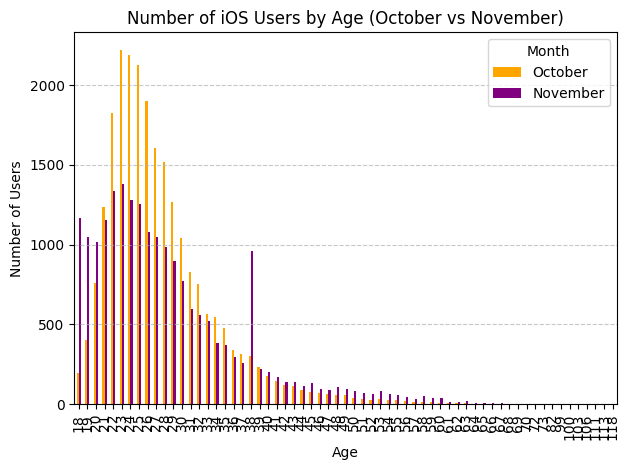

In [50]:
ios_october_age = ios_october.groupby('age').size()
ios_november_age = ios_november.groupby('age').size()

combined_age_data = pd.DataFrame({
    'October': ios_october_age,
    'November': ios_november_age
}).fillna(0)

plt.figure(figsize=(14, 8))
combined_age_data.plot(kind='bar', color=['orange', 'purple'])

plt.title('Number of iOS Users by Age (October vs November)')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Month')

plt.tight_layout()
plt.show()

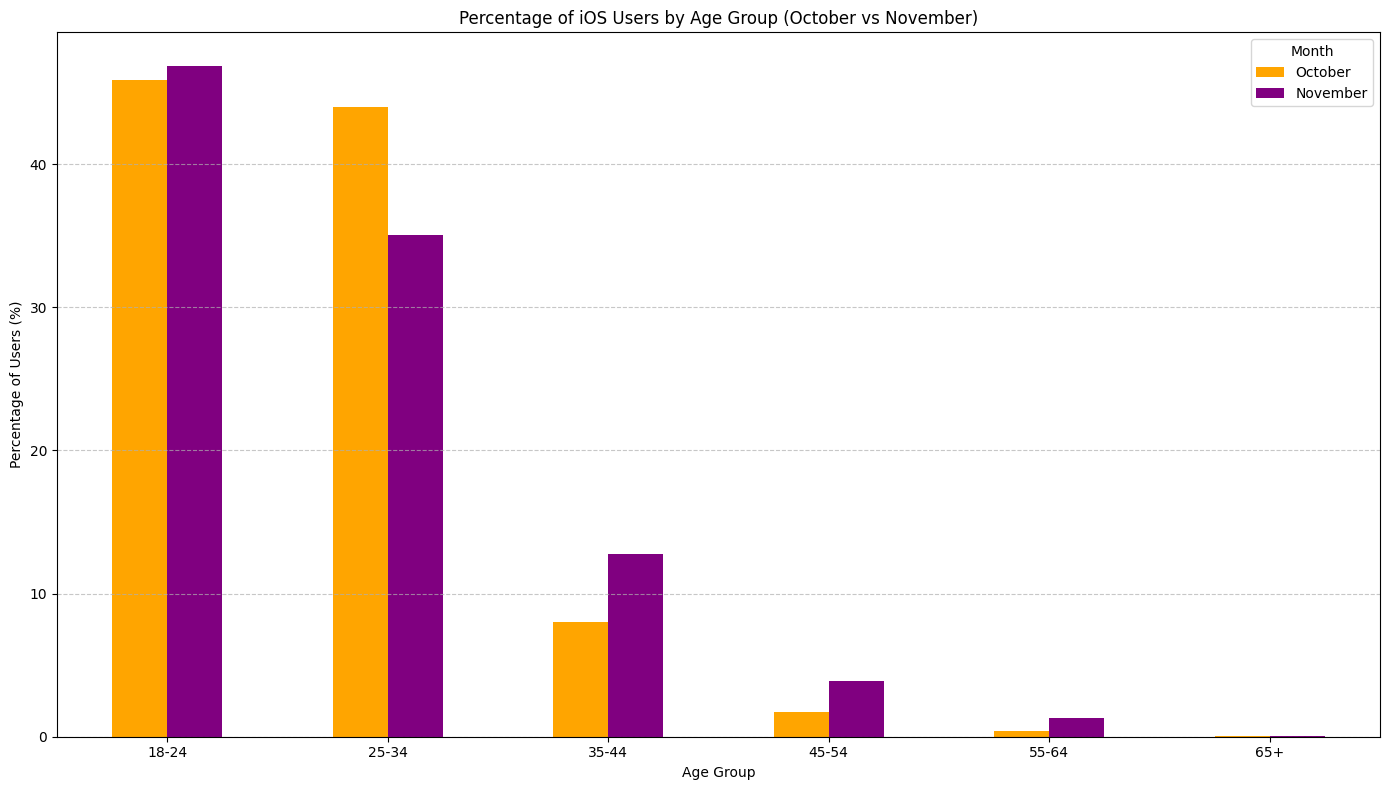

In [51]:
ios_data_october = user_data[(user_data['platform'] == 'iOS') & (user_data['registration_ts'].dt.month == 10)]
ios_data_november = user_data[(user_data['platform'] == 'iOS') & (user_data['registration_ts'].dt.month == 11)]

age_group_counts_october_ios = ios_data_october.groupby(['age_group']).size()
age_group_counts_november_ios = ios_data_november.groupby(['age_group']).size()

age_group_counts_ios = pd.DataFrame({
    'October': age_group_counts_october_ios,
    'November': age_group_counts_november_ios
}).fillna(0)

age_group_percentages_ios = age_group_counts_ios.div(age_group_counts_ios.sum(axis=0), axis=1) * 100

age_group_percentages_ios.plot(kind='bar', figsize=(14, 8), color=['orange', 'purple'])

plt.title('Percentage of iOS Users by Age Group (October vs November)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Users (%)')
plt.legend(title='Month', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [52]:
ios_retention_october_age_group = ios_october.groupby('age_group')['active_next_day'].mean() * 100
ios_retention_november_age_group = ios_november.groupby('age_group')['active_next_day'].mean() * 100

retention_age_group_comparison = pd.DataFrame({
    'October Retention (%)': ios_retention_october_age_group,
    'November Retention (%)': ios_retention_november_age_group
}).fillna(0)
october_age_group_counts = ios_october['age_group'].value_counts(normalize=True) * 100
november_age_group_counts = ios_november['age_group'].value_counts(normalize=True) * 100

retention_age_group_comparison['October % of Total Users'] = october_age_group_counts
retention_age_group_comparison['November % of Total Users'] = november_age_group_counts

retention_age_group_comparison['Change (%)'] = retention_age_group_comparison['November Retention (%)'] - retention_age_group_comparison['October Retention (%)']
retention_age_group_comparison

,October Retention (%),November Retention (%),October % of Total Users,November % of Total Users,Change (%)
age_group,,,,,
18-24,75.540948,70.716285,45.834205,46.855117,-4.824663
25-34,79.786829,79.692478,43.972047,35.062412,-0.094351
35-44,75.916230,71.694529,7.992635,12.783525,-4.221701
45-54,73.923445,72.986369,1.749174,3.919569,-0.937076
55-64,66.292135,70.037453,0.372432,1.296809,3.745318
65+,42.105263,52.941176,0.079508,0.082568,10.835913


###Correlation between Photo Count & Retention

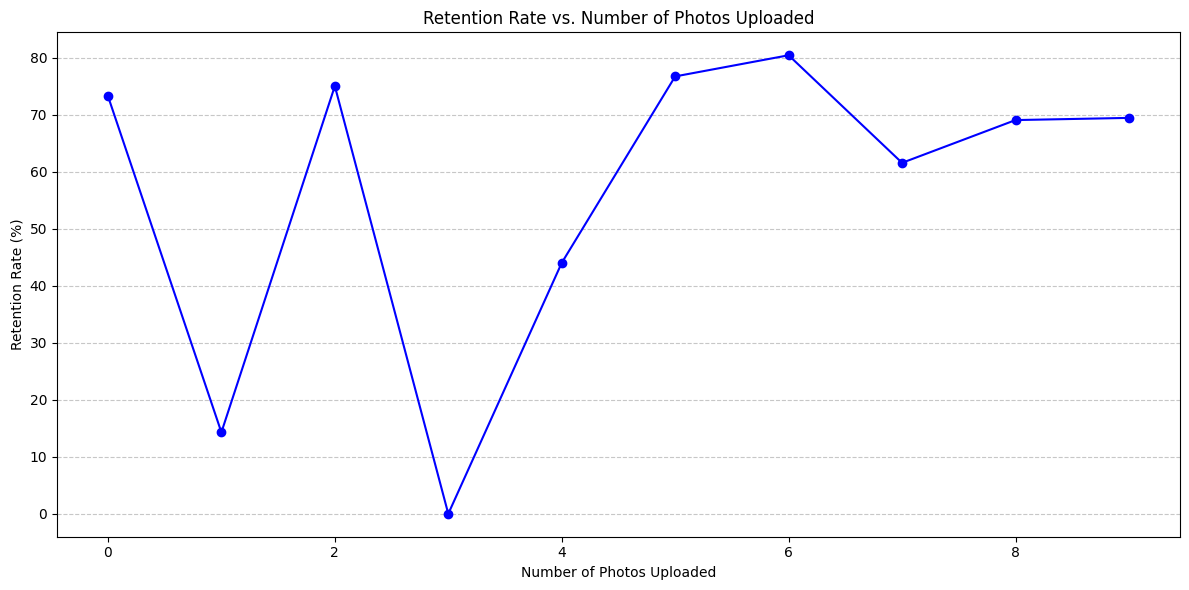

In [53]:
photo_retention = user_data.groupby('photos_count')['active_next_day'].mean() * 100
photo_retention_df = photo_retention.reset_index()
photo_retention_df.columns = ['Photos Count', 'Retention Rate (%)']
plt.figure(figsize=(12, 6))
plt.plot(photo_retention_df['Photos Count'], photo_retention_df['Retention Rate (%)'], marker='o', color='blue')
plt.title('Retention Rate vs. Number of Photos Uploaded')
plt.xlabel('Number of Photos Uploaded')
plt.ylabel('Retention Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Logistic Regression

### Over entire user data set to understand general drivers of retention

In [55]:
import statsmodels.api as sm

X = user_data[['age', 'photos_count', 'dogs', 'cats', 'gender', 'education_attained', 'metro_area', 'height', 'time_to_complete_profile_minutes', 'max_distance',  'age_pref_max', 'age_pref_min', 'hobby1', 'hobby2', 'hobby3', 'hobby4']]
y = user_data['active_next_day']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.513704
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        active_next_day   No. Observations:               111724
Model:                          Logit   Df Residuals:                   111707
Method:                           MLE   Df Model:                           16
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.05556
Time:                        08:12:59   Log-Likelihood:                -57393.
converged:                       True   LL-Null:                       -60769.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.4596      0.191     -7.65

### Over October vs November iOS User Base to Understand how retention drivers changed between these months

In [56]:
ios_october_data = user_data[(user_data['platform'] == 'iOS') &
                              (user_data['registration_ts'].dt.month == 10)]
X = ios_october_data[['age', 'photos_count', 'dogs', 'cats', 'gender', 'education_attained', 'metro_area', 'height', 'time_to_complete_profile_minutes', 'max_distance',  'age_pref_max', 'age_pref_min', 'hobby1', 'hobby2', 'hobby3', 'hobby4']]
y = ios_october_data['active_next_day']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

october_coef = result.params
october_std_err = result.bse
october_p_values = result.pvalues
october_confidence_intervals = result.conf_int()

october_summary = pd.DataFrame({
    'October_Coefficient': october_coef,
    'October_P-value': october_p_values,
})

Optimization terminated successfully.
         Current function value: 0.503995
         Iterations 6


In [57]:
ios_november_data = user_data[(user_data['platform'] == 'iOS') &
                              (user_data['registration_ts'].dt.month == 11)]
X = ios_november_data[['age', 'photos_count', 'dogs', 'cats', 'gender', 'education_attained', 'metro_area', 'height', 'time_to_complete_profile_minutes', 'max_distance',  'age_pref_max', 'age_pref_min', 'hobby1', 'hobby2', 'hobby3', 'hobby4']]
y = ios_november_data['active_next_day']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

november_coef = result.params
november_std_err = result.bse
november_p_values = result.pvalues
november_confidence_intervals = result.conf_int()

november_summary = pd.DataFrame({
    'November_Coefficient': november_coef,
    'November_P-value': november_p_values,

})

Optimization terminated successfully.
         Current function value: 0.536012
         Iterations 6


In [58]:
october_summary['October_Significant'] = october_summary['October_P-value'] < 0.05
november_summary['November_Significant'] = november_summary['November_P-value'] < 0.05
combined_summary = pd.concat([october_summary, november_summary], axis=1)
combined_summary

,October_Coefficient,October_P-value,October_Significant,November_Coefficient,November_P-value,November_Significant
const,-1.535603,2.929900e-04,True,-1.039031,1.077619e-02,True
age,0.008170,1.578393e-02,True,0.034223,8.075503e-37,True
photos_count,0.037634,8.958222e-02,False,0.113251,1.682338e-10,True
dogs,-0.100547,8.425173e-11,True,-0.074175,6.300152e-06,True
cats,-0.036628,3.895149e-02,True,-0.036340,4.834880e-02,True
gender,0.561744,1.776562e-29,True,0.664341,5.857491e-46,True
education_attained,0.120598,1.276432e-12,True,0.110210,2.275985e-11,True
metro_area,0.008847,1.394162e-25,True,0.007401,9.819083e-18,True
height,0.015339,3.918459e-12,True,0.009581,9.058024e-06,True
time_to_complete_profile_minutes,-0.009317,9.286302e-02,False,-0.001734,7.618174e-01,False


# Experiment Design

4. Your Product Manager (PM) asks you to design an experiment to improve the retention rate for all users (i.e., regardless of platform). You can either draw upon findings from your answer in question 3 or propose any other idea, but be sure your answer clearly states:
a. Your hypothesis
b. A description of the variants of your experiment
c. The primary outcomes you’ll use to evaluate your experiment d. Any other information you think will be useful for your PM

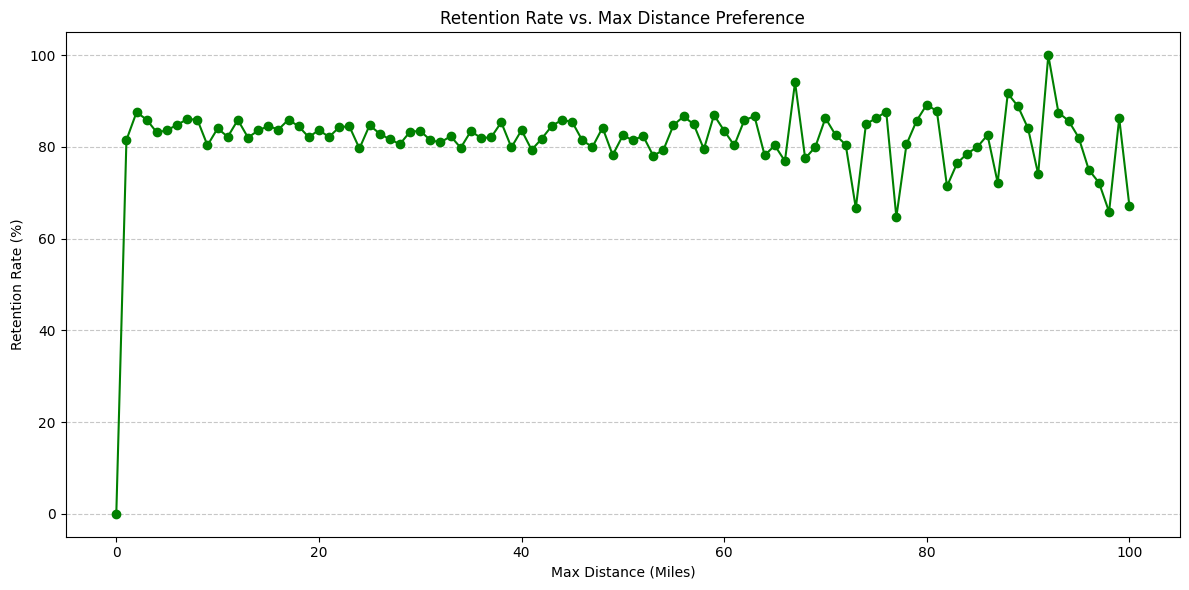

In [59]:
max_distance_retention = user_data.groupby('max_distance')['active_next_day'].mean() * 100

max_distance_retention_df = max_distance_retention.reset_index()
max_distance_retention_df.columns = ['Max Distance', 'Retention Rate (%)']

plt.figure(figsize=(12, 6))
plt.plot(max_distance_retention_df['Max Distance'], max_distance_retention_df['Retention Rate (%)'], marker='o', color='green')
plt.title('Retention Rate vs. Max Distance Preference')
plt.xlabel('Max Distance (Miles)')
plt.ylabel('Retention Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


From my findings in Question 3, I saw that users with a lower maximum distance had higher retention. The retention seems to vary in a negative direction past 60 miles.

* Higher maximum distance preferences are associated with lower retention.

Based on this, I would suggest a prompt that encourages users to lower their maximum distance if set above 60 miles.

1. **Hypothesis**: Encouraging users to lower their maximum distance preference to within an optimal range will increase retention rates.

2. **Variants**
* Variant A - Control Group: Users go through the existing onboarding.
* Variant B - Users with a max distance above the optimal range (ex: <60 miles) receive a prompt suggesting they lower their distance preference (e.g., “Expand your reach by finding matches closer to you!”).

3. **Testing Method**:
I suggest 50/50 A/B testing for this experiment.

4. **Metrics**:

*Primary Metrics*:
* Next-Day Retention Rate
* Day 7 Retention Rate

*Guardrail Metrics*:
* Profile Browsing Rate - It's important that we monitor that lowering the maximum distance doesn't lead to an insufficient amount of profiles for users to browse.
* Uninstallation/Churn Rate
